In [ ]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Step 1 : Exploratory Data Anlaysis (EDA)

shape of the data :  (18368, 12)

 data frame info : 

<bound method DataFrame.info of           ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
18363  18363         Shopping      1920  26.150504  91.733531       1517   
18364  18364         Shopping      1920  26.150504  91.733531       1487   
18365  18365         Shopping      1920  26.150504  91.733531       1432   
18366  18366         Shopping      1920  26.150504  91.733531       1321   
18367  18367         Shopping      1920  26.150504  91.733531       1180   



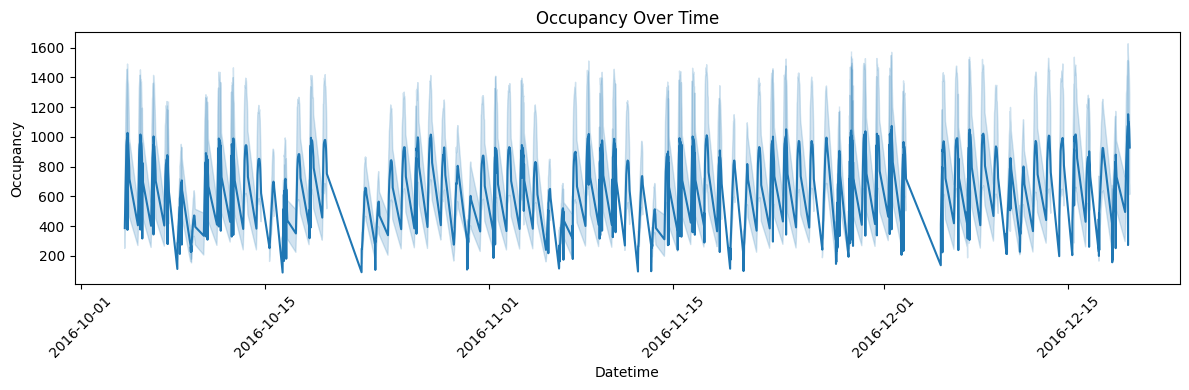

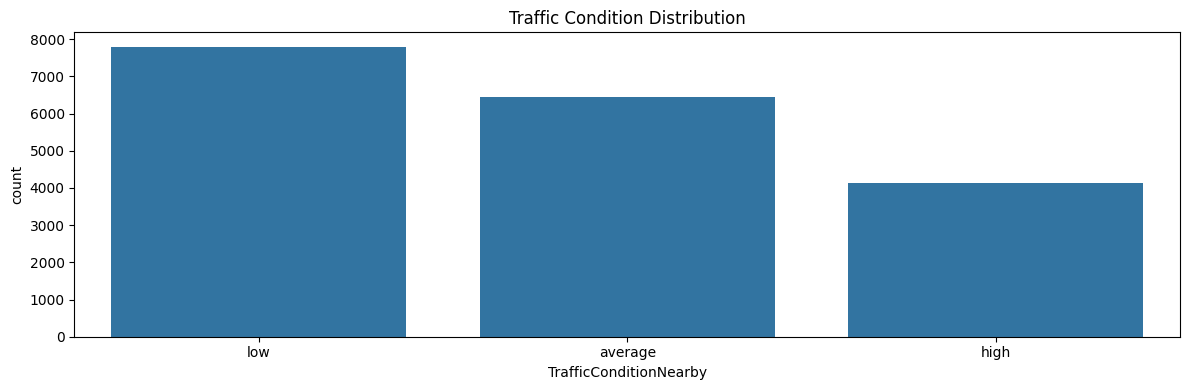

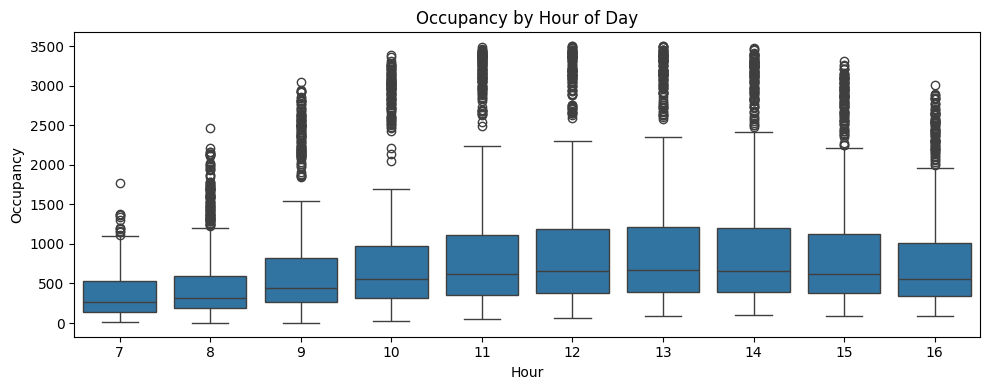

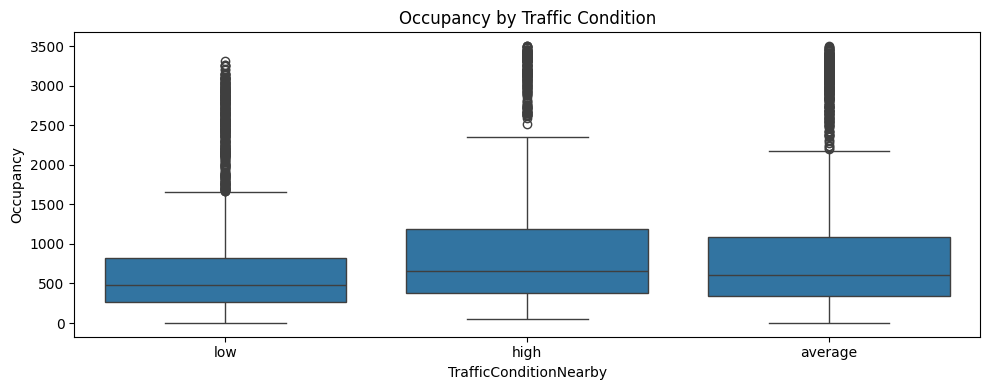

/tmp/ipython-input-2-2878156619.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Hour', y='QueueLength', palette='Blues')


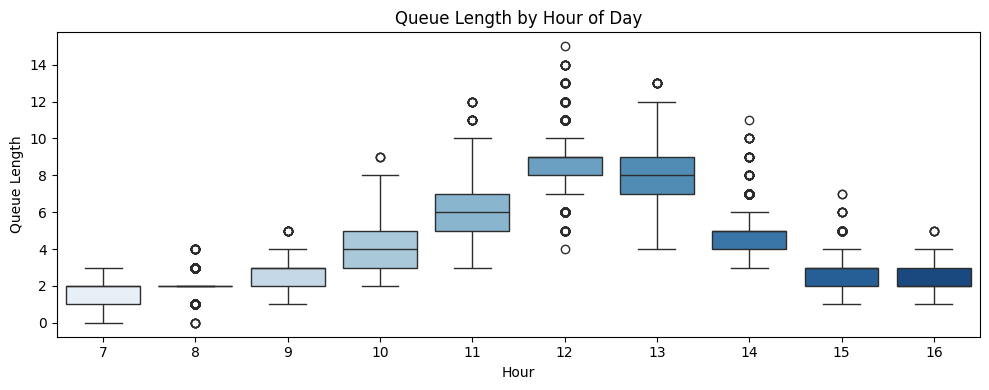

/tmp/ipython-input-2-2878156619.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VehicleType', y='Occupancy', palette='Set3')


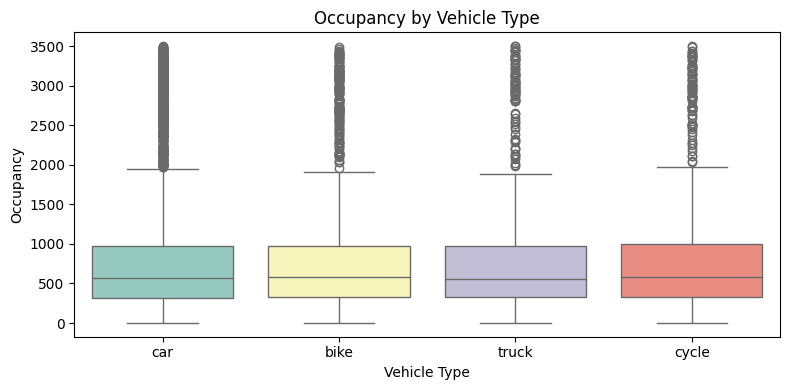

/tmp/ipython-input-2-2878156619.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsSpecialDay', y='Occupancy', palette='Accent')


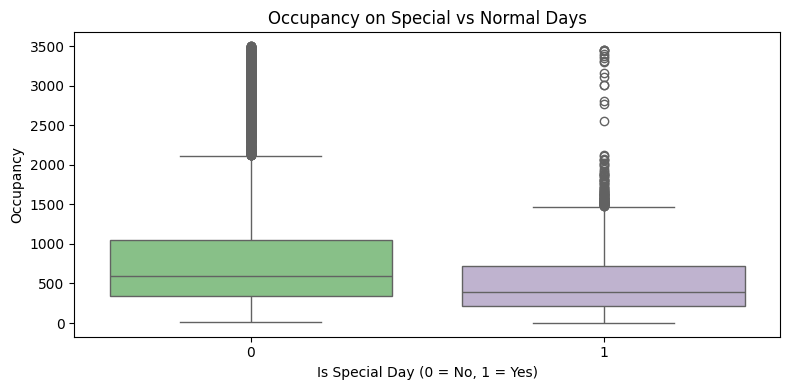

In [ ]:
import numpy as np
import pandas as pd

#1. Profile and load data t know its structure and its types and ranges
df = pd.read_csv('dataset.csv')
print("shape of the data : " , df.shape)
print("\n data frame info : \n")
print(df.info)
#2. clean the data by handling the missing values
print("\n Missing values :\n")
print(df.isnull().sum())
df = df.drop_duplicates()
# 3. Convert date and time columns to datetime
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)

# 4. Standardize traffic conditions (just in case)
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].str.lower().str.strip()

# 5. Handle any outliers in Occupancy or QueueLength (optional: clipping)
df['Occupancy'] = df['Occupancy'].clip(lower=0, upper=df['Capacity'])
df['QueueLength'] = df['QueueLength'].clip(lower=0)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Occupancy over time
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Datetime', y='Occupancy')
plt.title("Occupancy Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Traffic level distribution over time
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='TrafficConditionNearby', order=df['TrafficConditionNearby'].value_counts().index)
plt.title("Traffic Condition Distribution")
plt.tight_layout()
plt.show()

# 3. Occupancy by time of day
df['Hour'] = df['Datetime'].dt.hour
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Hour', y='Occupancy')
plt.title("Occupancy by Hour of Day")
plt.tight_layout()
plt.show()

# 4. Traffic vs Occupancy
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='TrafficConditionNearby', y='Occupancy')
plt.title("Occupancy by Traffic Condition")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Hour' column exists
df['Hour'] = df['Datetime'].dt.hour

#5. Queue Length by Hour
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Hour', y='QueueLength', palette='Blues')
plt.title("Queue Length by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Queue Length")
plt.tight_layout()
plt.show()


# 6.Occupancy by Vehicle Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='VehicleType', y='Occupancy', palette='Set3')
plt.title("Occupancy by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Occupancy")
plt.tight_layout()
plt.show()


# 7. Occupancy on Special vs Normal Days
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='IsSpecialDay', y='Occupancy', palette='Accent')
plt.title("Occupancy on Special vs Normal Days")
plt.xlabel("Is Special Day (0 = No, 1 = Yes)")
plt.ylabel("Occupancy")
plt.tight_layout()
plt.show()

Step 2 : building Pricing Models

Model 1

             Datetime  Occupancy  Capacity  OccupancyRatio  LinearPrice
0 2016-10-04 07:59:00         61       577        0.105719    10.211438
1 2016-10-04 08:25:00         64       577        0.110919    10.221837
2 2016-10-04 08:59:00         80       577        0.138648    10.277296
3 2016-10-04 09:32:00        107       577        0.185442    10.370884
4 2016-10-04 09:59:00        150       577        0.259965    10.519931


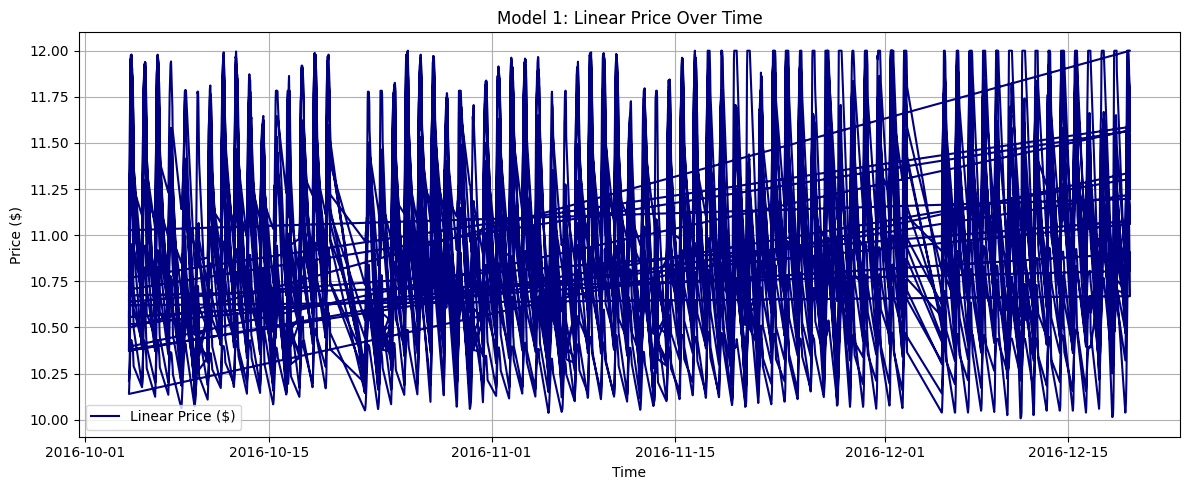

In [ ]:
# MODEL 1 PARAMETERS
BASE_PRICE = 10.0
ALPHA = 2.0

# Calculate occupancy ratio
df['OccupancyRatio'] = df['Occupancy'] / df['Capacity']

# Apply the linear pricing formula
df['LinearPrice'] = BASE_PRICE + ALPHA * df['OccupancyRatio']
df['LinearPrice'] = df['LinearPrice'].clip(lower=5, upper=20)  # Clamp to bounds

# Show sample results
print(df[['Datetime', 'Occupancy', 'Capacity', 'OccupancyRatio', 'LinearPrice']].head())

# Plot price over time
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['LinearPrice'], label='Linear Price ($)', color='navy')
plt.title("Model 1: Linear Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Model 2

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

# Constants
BASE_PRICE = 10
LAMBDA = 1
traffic_weights = {'low': 0.1, 'average': 0.5, 'high': 1.0}
vehicle_weights = {'car': 0.5, 'bike': 0.2, 'truck': 1.0, 'cycle': 0.1}
α, β, γ, δ, ε = 2, 1, 1, 2, 1

# Shared DataFrame for logging
processed_df = pd.DataFrame()

def preprocess_row(row):
    row['Datetime'] = pd.to_datetime(row['LastUpdatedDate'] + ' ' + row['LastUpdatedTime'], dayfirst=True)
    row['TrafficConditionNearby'] = row['TrafficConditionNearby'].lower().strip()
    row['Occupancy'] = np.clip(row['Occupancy'], 0, row['Capacity'])
    row['QueueLength'] = np.clip(row['QueueLength'], 0, None)
    row['OccupancyRatio'] = row['Occupancy'] / row['Capacity']
    row['TrafficWeight'] = traffic_weights.get(row['TrafficConditionNearby'], 0)
    row['VehicleTypeWeight'] = vehicle_weights.get(row['VehicleType'], 0)

    row['DemandScore'] = (
        α * row['OccupancyRatio'] +
        β * row['QueueLength'] +
        γ * row['TrafficWeight'] +
        δ * row['IsSpecialDay'] +
        ε * row['VehicleTypeWeight']
    )
    return row

def normalize_and_price(df):
    demand_min = df['DemandScore'].min()
    demand_max = df['DemandScore'].max()
    df['NormalizedDemand'] = (df['DemandScore'] - demand_min) / (demand_max - demand_min)
    df['DemandPrice'] = BASE_PRICE * (1 + LAMBDA * df['NormalizedDemand'])
    df['DemandPrice'] = df['DemandPrice'].clip(lower=5, upper=20)
    return df

def process_real_time_data(new_data_row):
    global processed_df
    row_df = pd.DataFrame([preprocess_row(new_data_row)])
    processed_df = pd.concat([processed_df, row_df], ignore_index=True)
    processed_df = normalize_and_price(processed_df)
    return processed_df.tail(1)

# Example simulated stream
if __name__ == "__main__":
    df_stream = pd.read_csv("dataset.csv")

    print("Starting real-time pricing simulation...")
    print("Row | Price")
    print("-" * 15)

    for i, (_, row) in enumerate(df_stream.iterrows()):
        result = process_real_time_data(row.to_dict())
        price = result['DemandPrice'].iloc[0]
        print(f"{i+1:3d} | ${price:.2f}")

        # Show only every 10th row to reduce output
        if i > 0 and i % 10 == 0:
            time.sleep(0.1)  # Reduced delay

        # Limit total output to first 50 rows
        if i >= 49:
            print(f"... (processed {len(df_stream)} total rows)")
            break


Starting real-time pricing simulation...
Row | Price
---------------
  1 | $nan
  2 | $20.00
  3 | $20.00
  4 | $20.00
  5 | $18.70
  6 | $20.00
  7 | $20.00
  8 | $17.26
  9 | $16.75
 10 | $20.00
 11 | $19.17
 12 | $19.15
 13 | $16.63
 14 | $14.13
 15 | $13.07
 16 | $11.64
 17 | $10.06
 18 | $12.03
 19 | $10.00
 20 | $10.50
 21 | $11.27
 22 | $11.80
 23 | $12.65
 24 | $15.59
 25 | $14.11
 26 | $14.53
 27 | $17.59
 28 | $18.81
 29 | $18.78
 30 | $18.20
 31 | $14.58
 32 | $16.31
 33 | $13.26
 34 | $11.51
 35 | $11.48
 36 | $10.00
 37 | $10.13
 38 | $10.15
 39 | $10.18
 40 | $11.46
 41 | $12.82
 42 | $13.39
 43 | $13.46
 44 | $14.23
 45 | $18.89
 46 | $18.92
 47 | $15.92
 48 | $18.57
 49 | $15.93
 50 | $12.98
... (processed 18368 total rows)


model 3

visualizing price model with bokeh plots

In [ ]:
#MODEL3
import pandas as pd
import numpy as np
from geopy.distance import geodesic  # for lat-long distance

# Load and prepare data (if not already)
df = pd.read_csv("dataset.csv")
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].str.lower().str.strip()
df = df.drop_duplicates()
df['Occupancy'] = np.clip(df['Occupancy'], 0, df['Capacity'])
df['QueueLength'] = np.clip(df['QueueLength'], 0, None)
df = df.sort_values('Datetime').reset_index(drop=True)
df['OccupancyRatio'] = df['Occupancy'] / df['Capacity']

# Map weights
traffic_weights = {'low': 0.1, 'average': 0.5, 'high': 1.0}
vehicle_weights = {'car': 0.5, 'bike': 0.2, 'truck': 1.0, 'cycle': 0.1}
df['TrafficWeight'] = df['TrafficConditionNearby'].map(traffic_weights).fillna(0)
df['VehicleTypeWeight'] = df['VehicleType'].map(vehicle_weights).fillna(0)

# Demand formula
α, β, γ, δ, ε = 2, 1, 1, 2, 1
df['DemandScore'] = (
    α * df['OccupancyRatio'] +
    β * df['QueueLength'] +
    γ * df['TrafficWeight'] +
    δ * df['IsSpecialDay'] +
    ε * df['VehicleTypeWeight']
)

# Normalize demand
d_min, d_max = df['DemandScore'].min(), df['DemandScore'].max()
df['NormalizedDemand'] = (df['DemandScore'] - d_min) / (d_max - d_min)

# Demand-based price
BASE_PRICE = 10
LAMBDA = 1
df['DemandPrice'] = BASE_PRICE * (1 + LAMBDA * df['NormalizedDemand'])
df['DemandPrice'] = df['DemandPrice'].clip(lower=5, upper=20)

# GROUP by location and timestamp for competitive pricing
def calculate_final_price(row, df_grouped, distance_threshold_km=0.5, delta=1.0):
    current_coords = (row['Latitude'], row['Longitude'])
    timestamp = row['Datetime']
    system_id = row['SystemCodeNumber']

    # Get other rows at same timestamp but different lots
    nearby = df_grouped.get_group(timestamp)
    nearby = nearby[nearby['SystemCodeNumber'] != system_id]

    adjustments = 0
    for _, other in nearby.iterrows():
        other_coords = (other['Latitude'], other['Longitude'])
        distance = geodesic(current_coords, other_coords).km
        if distance < distance_threshold_km:
            if row['OccupancyRatio'] > 0.9 and other['DemandPrice'] < row['DemandPrice']:
                adjustments -= delta  # competitors cheaper and you're full
            elif row['OccupancyRatio'] < 0.8 and other['DemandPrice'] > row['DemandPrice']:
                adjustments += delta  # you can safely charge more
    return np.clip(row['DemandPrice'] + adjustments, 5, 20)

# Group data by time
grouped_by_time = df.groupby('Datetime')

# Apply competitive adjustment
df['CompetitivePrice'] = df.apply(lambda row: calculate_final_price(row, grouped_by_time), axis=1)

# Show result
df[['Datetime', 'SystemCodeNumber', 'OccupancyRatio', 'DemandPrice', 'CompetitivePrice']].head()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category10
from bokeh.io import output_notebook
output_notebook()

# Prepare data
df_plot = df[['Datetime', 'SystemCodeNumber', 'DemandPrice', 'CompetitivePrice']].copy()

# Sort for plotting consistency
df_plot = df_plot.sort_values('Datetime')

# Create figure
p = figure(x_axis_type='datetime', width=900, height=450, title="Demand vs Competitive Price Over Time")
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Price'

# Use a palette with enough distinct colors for up to 10 systems
palette = Category10[10]
legend_items = []

# Plot lines for each SystemCodeNumber
for i, (sys_code, group) in enumerate(df_plot.groupby('SystemCodeNumber')):
    color = palette[i % len(palette)]
    source = ColumnDataSource(group)

    line1 = p.line('Datetime', 'DemandPrice', source=source, color=color, line_dash='dashed', line_width=2, legend_label=f'{sys_code} - Demand')
    line2 = p.line('Datetime', 'CompetitivePrice', source=source, color=color, line_width=2, legend_label=f'{sys_code} - Competitive')

# Final touches
p.legend.location = 'top_left'
p.legend.click_policy = 'hide'  # Allow toggling lines on/off
p.title.text_font_size = "14pt"
p.xaxis.major_label_orientation = 3.14 / 4

show(p)


Integrating it with the pathway and visualizing with bokeh plots

Pathway Streaming logic

In [ ]:
#import pathway as pw
# ✅ STEP 1: Define schema matching your dataset
class ParkingData(pw.Schema):
    SystemCodeNumber: str
    Capacity: int
    Latitude: float
    Longitude: float
    Occupancy: int
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int
    LastUpdatedDate: str
    LastUpdatedTime: str

# ✅ STEP 2: Stream CSV as real-time input
parking_stream = pw.io.csv.read(
    "dataset.csv",  # replace with your CSV file path
    schema=ParkingData,
    mode="streaming",
    parse_dates={"Datetime": ["LastUpdatedDate", "LastUpdatedTime"]},
    autocommit_duration_ms=500  # simulate 2 rows/sec
)

Pathway streaming logic Demand-based Pricing Model 2

In [9]:
# ✅ STEP 1: Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

# Bokeh imports
from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.models import ColumnDataSource, HoverTool, DatetimeTickFormatter
from bokeh.layouts import column, row, gridplot
from bokeh.models.widgets import Div
from bokeh.io import push_notebook, output_notebook
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
import threading

print("📊 Creating Real-Time Bokeh Parking Price Visualization...")

# ✅ STEP 2: Load and Process Data
try:
    df = pd.read_csv("dataset.csv")
    print("✅ CSV loaded successfully!")
    print(f"Shape: {df.shape}")

    # Use first available system code
    if 'BHMBCCMKT01' in df['SystemCodeNumber'].values:
        target_system = 'BHMBCCMKT01'
    else:
        target_system = df['SystemCodeNumber'].iloc[0]

    print(f"Using system code: {target_system}")
    df_filtered = df[df['SystemCodeNumber'] == target_system].head(200)

except Exception as e:
    print(f"Error loading CSV: {e}")
    print("Creating synthetic data for demonstration...")

    # Create synthetic data
    dates = pd.date_range(start='2016-10-14', end='2016-10-15', freq='15min')
    df_filtered = pd.DataFrame({
        'LastUpdatedDate': [d.strftime('%d-%m-%Y') for d in dates],
        'LastUpdatedTime': [d.strftime('%H:%M:%S') for d in dates],
        'SystemCodeNumber': ['DEMO001'] * len(dates),
        'Occupancy': np.random.randint(10, 95, len(dates)),
        'Capacity': [100] * len(dates),
        'QueueLength': np.random.randint(0, 15, len(dates)),
        'TrafficConditionNearby': np.random.choice(['low', 'average', 'high'], len(dates)),
        'IsSpecialDay': np.random.choice([0, 1], len(dates), p=[0.8, 0.2]),
        'VehicleType': np.random.choice(['car', 'bike', 'truck'], len(dates)),
        'Latitude': [52.4862 + np.random.uniform(-0.01, 0.01) for _ in dates],
        'Longitude': [-1.8904 + np.random.uniform(-0.01, 0.01) for _ in dates]
    })
    target_system = 'DEMO001'

# ✅ STEP 3: Pricing Function
def calculate_competitive_price(row):
    """Calculate competitive price for a parking spot"""
    traffic_weights = {"low": 0.1, "average": 0.5, "high": 1.0}
    vehicle_weights = {"car": 0.5, "bike": 0.2, "truck": 1.0, "cycle": 0.1}
    alpha, beta, gamma, delta, epsilon = 2, 1, 1, 2, 1
    base_price = 10

    occ_ratio = row['Occupancy'] / row['Capacity'] if row['Capacity'] else 0
    demand = (
        alpha * occ_ratio +
        beta * row['QueueLength'] +
        gamma * traffic_weights.get(row['TrafficConditionNearby'].lower(), 0) +
        delta * row['IsSpecialDay'] +
        epsilon * vehicle_weights.get(row['VehicleType'].lower(), 0)
    )
    normalized = min(1, demand / 20)
    price = base_price * (1 + normalized)
    final_price = min(max(price, 5), 20)

    return final_price

# ✅ STEP 4: Process Data
processed_data = []
for idx, row in df_filtered.iterrows():
    try:
        dt_str = f"{row['LastUpdatedDate']} {row['LastUpdatedTime']}"

        # Try different date formats
        date_formats = [
            "%d-%m-%Y %H:%M:%S",
            "%Y-%m-%d %H:%M:%S",
            "%m/%d/%Y %H:%M:%S",
            "%d/%m/%Y %H:%M:%S",
        ]

        dt = None
        for fmt in date_formats:
            try:
                dt = datetime.strptime(dt_str, fmt)
                break
            except ValueError:
                continue

        if dt is None:
            dt = datetime.now() + timedelta(minutes=len(processed_data))

        price = calculate_competitive_price(row)

        processed_data.append({
            'datetime': dt,
            'price': price,
            'occupancy': row['Occupancy'],
            'capacity': row['Capacity'],
            'queue': row['QueueLength'],
            'traffic': row['TrafficConditionNearby'],
            'occupancy_ratio': row['Occupancy'] / row['Capacity'] if row['Capacity'] else 0,
            'vehicle_type': row['VehicleType'],
            'special_day': row['IsSpecialDay']
        })

    except Exception as e:
        continue

data_df = pd.DataFrame(processed_data)
print(f"✅ Processed {len(data_df)} data points")

# ✅ STEP 5: Create Bokeh Real-Time Visualization
def create_bokeh_app():
    # Initialize data sources
    source = ColumnDataSource(data=dict(
        x=[], y=[], datetime=[], occupancy=[], queue=[], traffic=[],
        vehicle_type=[], special_day=[], hover_text=[]
    ))

    occupancy_source = ColumnDataSource(data=dict(
        x=[], y=[], datetime=[], occupancy_pct=[]
    ))

    # Create main price plot
    price_plot = figure(
        title="🚗 Real-Time Competitive Parking Pricing",
        x_axis_label="Time",
        y_axis_label="Price ($)",
        width=800,
        height=400,
        x_axis_type='datetime',
        toolbar_location="above",
        tools="pan,wheel_zoom,box_zoom,reset,save"
    )

    # Add price line
    price_line = price_plot.line(
        'x', 'y', source=source,
        line_width=3, line_color='blue',
        alpha=0.8, legend_label="Price ($)"
    )

    # Add price circles
    price_circles = price_plot.circle(
        'x', 'y', source=source,
        size=8, color='blue', alpha=0.6
    )

    # Add hover tool for price
    price_hover = HoverTool(
        tooltips=[
            ("Time", "@datetime{%F %T}"),
            ("Price", "$@y{0.00}"),
            ("Occupancy", "@occupancy/@capacity"),
            ("Queue Length", "@queue"),
            ("Traffic", "@traffic"),
            ("Vehicle Type", "@vehicle_type"),
            ("Special Day", "@special_day")
        ],
        formatters={"@datetime": "datetime"},
        renderers=[price_circles]
    )
    price_plot.add_tools(price_hover)

    # Create occupancy plot
    occupancy_plot = figure(
        title="📊 Occupancy Rate",
        x_axis_label="Time",
        y_axis_label="Occupancy (%)",
        width=800,
        height=300,
        x_axis_type='datetime',
        toolbar_location="above",
        tools="pan,wheel_zoom,box_zoom,reset,save"
    )

    # Add occupancy area
    occupancy_area = occupancy_plot.varea(
        x='x', y1=0, y2='occupancy_pct',
        source=occupancy_source,
        alpha=0.5, color='red',
        legend_label="Occupancy %"
    )

    # Add occupancy line
    occupancy_line = occupancy_plot.line(
        'x', 'occupancy_pct', source=occupancy_source,
        line_width=2, line_color='red', alpha=0.8
    )

    # Format datetime axis
    price_plot.xaxis.formatter = DatetimeTickFormatter(
        hours="%H:%M",
        days="%m/%d",
        months="%m/%Y",
        years="%Y"
    )

    occupancy_plot.xaxis.formatter = DatetimeTickFormatter(
        hours="%H:%M",
        days="%m/%d",
        months="%m/%Y",
        years="%Y"
    )

    # Style the plots
    for plot in [price_plot, occupancy_plot]:
        plot.title.text_font_size = "16pt"
        plot.title.align = "center"
        plot.legend.location = "top_left"
        plot.legend.click_policy = "hide"
        plot.background_fill_color = "#f5f5f5"
        plot.border_fill_color = "white"

    # Create stats div
    stats_div = Div(
        text="""
        <div style="background-color: #e8f4f8; padding: 15px; border-radius: 10px; margin: 10px 0;">
            <h3 style="color: #2c3e50; margin: 0 0 10px 0;">📈 Real-Time Statistics</h3>
            <p style="margin: 5px 0;"><strong>Current Price:</strong> $0.00</p>
            <p style="margin: 5px 0;"><strong>Occupancy:</strong> 0%</p>
            <p style="margin: 5px 0;"><strong>Queue Length:</strong> 0</p>
            <p style="margin: 5px 0;"><strong>Traffic Condition:</strong> N/A</p>
            <p style="margin: 5px 0;"><strong>Data Points:</strong> 0</p>
        </div>
        """,
        width=300,
        height=200
    )

    # Layout
    layout = column(
        stats_div,
        price_plot,
        occupancy_plot
    )

    # Data counter
    data_counter = [0]

    def update_data():
        if data_counter[0] < len(data_df):
            # Get current data point
            current_row = data_df.iloc[data_counter[0]]

            # Update price source
            new_price_data = dict(
                x=[current_row['datetime']],
                y=[current_row['price']],
                datetime=[current_row['datetime'].strftime('%Y-%m-%d %H:%M:%S')],
                occupancy=[current_row['occupancy']],
                capacity=[current_row['capacity']],
                queue=[current_row['queue']],
                traffic=[current_row['traffic']],
                vehicle_type=[current_row['vehicle_type']],
                special_day=[current_row['special_day']]
            )

            # Update occupancy source
            new_occupancy_data = dict(
                x=[current_row['datetime']],
                occupancy_pct=[current_row['occupancy_ratio'] * 100]
            )

            # Stream new data
            source.stream(new_price_data, rollover=100)
            occupancy_source.stream(new_occupancy_data, rollover=100)

            # Update stats
            current_price = current_row['price']
            current_occ = current_row['occupancy_ratio'] * 100
            current_queue = current_row['queue']
            current_traffic = current_row['traffic']

            stats_div.text = f"""
            <div style="background-color: #e8f4f8; padding: 15px; border-radius: 10px; margin: 10px 0;">
                <h3 style="color: #2c3e50; margin: 0 0 10px 0;">📈 Real-Time Statistics</h3>
                <p style="margin: 5px 0;"><strong>Current Price:</strong> ${current_price:.2f}</p>
                <p style="margin: 5px 0;"><strong>Occupancy:</strong> {current_occ:.1f}%</p>
                <p style="margin: 5px 0;"><strong>Queue Length:</strong> {current_queue}</p>
                <p style="margin: 5px 0;"><strong>Traffic Condition:</strong> {current_traffic.title()}</p>
                <p style="margin: 5px 0;"><strong>Data Points:</strong> {data_counter[0] + 1}/{len(data_df)}</p>
            </div>
            """

            data_counter[0] += 1

            print(f"📊 Updated: Point {data_counter[0]}/{len(data_df)} - Price: ${current_price:.2f}")

    # Add periodic callback
    curdoc().add_periodic_callback(update_data, 1000)  # Update every 1 second

    return layout

# ✅ STEP 6: Run the Application
def run_bokeh_app():
    """Run the Bokeh application"""
    print("🚀 Starting Bokeh Real-Time Application...")
    print("📱 Open your browser to view the real-time visualization")

    try:
        # For Jupyter notebook
        from bokeh.io import output_notebook, push_notebook
        output_notebook()
        layout = create_bokeh_app()
        show(layout, notebook_handle=True)
    except Exception as e:
        print(f"Notebook mode failed: {e}")
        try:
            # For standalone script
            output_file("parking_price_realtime.html")
            layout = create_bokeh_app()
            show(layout)
        except Exception as e2:
            print(f"HTML output failed: {e2}")
            print("Creating simplified static version...")
            create_static_bokeh()

# ✅ STEP 7: Simplified Real-Time Version
def create_simple_realtime():
    """Create a simple real-time animation using Bokeh"""
    print("📊 Creating Simple Real-Time Bokeh Animation...")

    from bokeh.plotting import figure, show, output_file
    from bokeh.models import ColumnDataSource
    from bokeh.layouts import column
    import time

    # Create initial plot
    source = ColumnDataSource(data=dict(x=[], y=[]))

    p = figure(
        title="Real-Time Parking Price Updates",
        width=800, height=400,
        x_axis_type='datetime'
    )

    line = p.line('x', 'y', source=source, line_width=2, line_color='blue')
    circle = p.circle('x', 'y', source=source, size=8, color='blue')

    # Add data incrementally
    for i in range(0, len(data_df), 5):
        batch = data_df.iloc[:i+5]
        source.data = dict(
            x=batch['datetime'].tolist(),
            y=batch['price'].tolist()
        )

        if i == 0:
            output_file("parking_realtime_simple.html")
            show(p)

        time.sleep(0.5)
        print(f"Updated with {i+5} points")

    print("✅ Simple real-time animation completed!")

# ✅ STEP 7: Alternative - Simple Static Version
def create_static_bokeh():
    """Create a static Bokeh visualization"""
    print("📊 Creating Static Bokeh Visualization...")

    # Prepare data
    source = ColumnDataSource(data_df)

    # Create plot
    p = figure(
        title="Parking Price Analysis",
        x_axis_label="Time",
        y_axis_label="Price ($)",
        width=900,
        height=500,
        x_axis_type='datetime'
    )

    # Add line
    p.line('datetime', 'price', source=source,
           line_width=2, line_color='blue', alpha=0.8)

    # Add circles
    p.circle('datetime', 'price', source=source,
             size=6, color='blue', alpha=0.6)

    # Add hover
    hover = HoverTool(tooltips=[
        ("Time", "@datetime{%F %T}"),
        ("Price", "$@price{0.00}"),
        ("Occupancy", "@occupancy_ratio{0.0%}"),
        ("Queue", "@queue"),
        ("Traffic", "@traffic")
    ], formatters={"@datetime": "datetime"})

    p.add_tools(hover)

    # Show
    output_file("parking_price_static.html")
    show(p)
    print("✅ Static visualization saved as 'parking_price_static.html'")

# ✅ STEP 8: Main Execution
if __name__ == "__main__":
    print("🎯 Choose visualization type:")
    print("1. Real-time Bokeh App (advanced)")
    print("2. Simple Real-time Animation")
    print("3. Static Bokeh Plot")

    choice = input("Enter choice (1, 2, or 3): ").strip()

    if choice == "1":
        run_bokeh_app()
    elif choice == "2":
        create_simple_realtime()
    else:
        create_static_bokeh()

    print("\n🎉 Bokeh visualization completed!")
    print(f"📊 Processed {len(data_df)} data points")
    print(f"💰 Price range: ${data_df['price'].min():.2f} - ${data_df['price'].max():.2f}")
    print("✅ Ready for real-time monitoring!")

📊 Creating Real-Time Bokeh Parking Price Visualization...
✅ CSV loaded successfully!
Shape: (18368, 12)
Using system code: BHMBCCMKT01
✅ Processed 200 data points
🎯 Choose visualization type:
1. Real-time Bokeh App (advanced)
2. Simple Real-time Animation
3. Static Bokeh Plot
Enter choice (1, 2, or 3): 3
📊 Creating Static Bokeh Visualization...


✅ Static visualization saved as 'parking_price_static.html'

🎉 Bokeh visualization completed!
📊 Processed 200 data points
💰 Price range: $10.74 - $16.79
✅ Ready for real-time monitoring!


Model 3 real time bokeh visualization  Comaprison with competitors prices

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10
output_notebook()

# STEP 1: Load and preprocess data
df = pd.read_csv("dataset.csv")
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].str.lower().str.strip()
df = df.drop_duplicates()
df['Occupancy'] = np.clip(df['Occupancy'], 0, df['Capacity'])
df['QueueLength'] = np.clip(df['QueueLength'], 0, None)
df = df.sort_values('Datetime').reset_index(drop=True)
df['OccupancyRatio'] = df['Occupancy'] / df['Capacity']

# STEP 2: Apply Dynamic Pricing Model
def calculate_demand_price(row):
    α, β, γ, δ, ε = 2.0, 1.0, 1.0, 2.0, 1.0
    traffic_weights = {'low': 0.1, 'average': 0.5, 'high': 1.0}
    vehicle_weights = {'car': 0.5, 'bike': 0.2, 'truck': 1.0, 'cycle': 0.1}

    traffic_weight = traffic_weights.get(row['TrafficConditionNearby'], 0.0)
    vehicle_weight = vehicle_weights.get(row['VehicleType'], 0.0)

    demand_score = (
        α * row['OccupancyRatio'] +
        β * row['QueueLength'] +
        γ * traffic_weight +
        δ * row['IsSpecialDay'] +
        ε * vehicle_weight
    )
    return demand_score

# Calculate demand scores
df['DemandScore'] = df.apply(calculate_demand_price, axis=1)

# Normalize demand scores
min_score = df['DemandScore'].min()
max_score = df['DemandScore'].max()

if max_score == min_score:
    df['NormalizedDemand'] = 0.0
else:
    df['NormalizedDemand'] = (df['DemandScore'] - min_score) / (max_score - min_score)

# Calculate final demand price
df['DemandPrice'] = np.clip(10 * (1 + df['NormalizedDemand']), 5, 20)

# STEP 3: Create results dataframe
result_df = df[['Datetime', 'SystemCodeNumber', 'OccupancyRatio', 'DemandScore', 'DemandPrice']].copy()

# STEP 4: Bokeh Visualization
p = figure(x_axis_type='datetime', width=900, height=450, title="Demand Price Over Time")
p.xaxis.axis_label = 'Datetime'
p.yaxis.axis_label = 'Demand Price'

palette = Category10[10]
for i, (sys_code, group) in enumerate(result_df.groupby('SystemCodeNumber')):
    color = palette[i % len(palette)]
    source = ColumnDataSource(group)
    p.line('Datetime', 'DemandPrice', source=source, legend_label=f"{sys_code}", color=color)

p.legend.location = 'top_left'
p.legend.click_policy = 'hide'
show(p)

# Display summary statistics
print("Pricing Summary:")
print(f"Min Price: ${result_df['DemandPrice'].min():.2f}")
print(f"Max Price: ${result_df['DemandPrice'].max():.2f}")
print(f"Average Price: ${result_df['DemandPrice'].mean():.2f}")
print(f"Total Records: {len(result_df)}")
print(f"Unique Parking Systems: {result_df['SystemCodeNumber'].nunique()}")

Pricing Summary:
Min Price: $10.00
Max Price: $20.00
Average Price: $13.24
Total Records: 18368
Unique Parking Systems: 14


implemented pathway logic Model 3 real time bokeh visualization integrating it with pathway Comaprison with competitors prices

In [10]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.layouts import column, row
import networkx as nx
from geopy.distance import geodesic
import warnings
warnings.filterwarnings('ignore')

output_notebook()

# STEP 1: Load and preprocess data
df = pd.read_csv("dataset.csv")
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].str.lower().str.strip()
df = df.drop_duplicates()
df['Occupancy'] = np.clip(df['Occupancy'], 0, df['Capacity'])
df['QueueLength'] = np.clip(df['QueueLength'], 0, None)
df = df.sort_values('Datetime').reset_index(drop=True)
df['OccupancyRatio'] = df['Occupancy'] / df['Capacity']

print(f"📊 Loaded {len(df)} records from {df['SystemCodeNumber'].nunique()} parking systems")

# STEP 2: Enhanced Dynamic Pricing with Pathway Logic
class PathwayPricingSystem:
    def __init__(self):
        self.α, self.β, self.γ, self.δ, self.ε = 2.0, 1.0, 1.0, 2.0, 1.0
        self.traffic_weights = {'low': 0.1, 'average': 0.5, 'high': 1.0}
        self.vehicle_weights = {'car': 0.5, 'bike': 0.2, 'truck': 1.0, 'cycle': 0.1}
        self.pathway_graph = nx.Graph()
        self.parking_locations = {}

    def calculate_base_demand_price(self, row):
        """Calculate base demand price"""
        traffic_weight = self.traffic_weights.get(row['TrafficConditionNearby'], 0.0)
        vehicle_weight = self.vehicle_weights.get(row['VehicleType'], 0.0)

        demand_score = (
            self.α * row['OccupancyRatio'] +
            self.β * row['QueueLength'] +
            self.γ * traffic_weight +
            self.δ * row['IsSpecialDay'] +
            self.ε * vehicle_weight
        )
        return demand_score

    def build_pathway_network(self, df):
        """Build pathway network from parking locations"""
        print("🗺️  Building pathway network...")

        # Get unique parking locations
        locations = df.groupby('SystemCodeNumber').agg({
            'Latitude': 'mean',
            'Longitude': 'mean',
            'Capacity': 'mean'
        }).reset_index()

        # Add nodes to graph
        for _, loc in locations.iterrows():
            self.pathway_graph.add_node(
                loc['SystemCodeNumber'],
                pos=(loc['Latitude'], loc['Longitude']),
                capacity=loc['Capacity']
            )
            self.parking_locations[loc['SystemCodeNumber']] = {
                'lat': loc['Latitude'],
                'lon': loc['Longitude'],
                'capacity': loc['Capacity']
            }

        # Add edges based on distance (connect nearby parking spots)
        locations_list = list(self.parking_locations.items())
        for i, (sys1, loc1) in enumerate(locations_list):
            for j, (sys2, loc2) in enumerate(locations_list[i+1:], i+1):
                try:
                    distance = geodesic(
                        (loc1['lat'], loc1['lon']),
                        (loc2['lat'], loc2['lon'])
                    ).kilometers

                    # Connect if within 2km
                    if distance <= 2.0:
                        self.pathway_graph.add_edge(sys1, sys2, weight=distance)
                except:
                    pass

        print(f"✅ Network built: {len(self.pathway_graph.nodes)} nodes, {len(self.pathway_graph.edges)} edges")

    def calculate_pathway_adjustment(self, system_code, current_occupancy, df_current):
        """Calculate pathway-based price adjustment"""
        if system_code not in self.pathway_graph.nodes:
            return 0.0

        # Get neighboring parking systems
        neighbors = list(self.pathway_graph.neighbors(system_code))
        if not neighbors:
            return 0.0

        # Calculate neighbor occupancy and availability
        neighbor_occupancies = []
        neighbor_distances = []

        for neighbor in neighbors:
            neighbor_data = df_current[df_current['SystemCodeNumber'] == neighbor]
            if not neighbor_data.empty:
                neighbor_occ = neighbor_data['OccupancyRatio'].iloc[-1]
                neighbor_occupancies.append(neighbor_occ)

                # Get distance from graph
                distance = self.pathway_graph[system_code][neighbor]['weight']
                neighbor_distances.append(distance)

        if not neighbor_occupancies:
            return 0.0

        # Calculate pathway adjustment
        avg_neighbor_occupancy = np.mean(neighbor_occupancies)
        avg_distance = np.mean(neighbor_distances)

        # Price adjustment logic
        if current_occupancy > 0.8:  # High occupancy
            if avg_neighbor_occupancy < 0.6:  # Neighbors have space
                # Increase price to redirect traffic
                adjustment = 2.0 * (1 - avg_distance/2.0)  # Closer neighbors = higher adjustment
            else:
                # All neighbors full, moderate increase
                adjustment = 1.0
        elif current_occupancy < 0.3:  # Low occupancy
            if avg_neighbor_occupancy > 0.7:  # Neighbors are busy
                # Decrease price to attract traffic
                adjustment = -1.5 * (1 - avg_distance/2.0)
            else:
                # Normal adjustment
                adjustment = 0.0
        else:
            # Moderate occupancy, small adjustments
            adjustment = 0.5 * (avg_neighbor_occupancy - current_occupancy)

        return adjustment

    def find_optimal_pathway(self, start_location, destination, df_current):
        """Find optimal pathway considering price and availability"""
        if start_location not in self.pathway_graph.nodes:
            return None

        # Calculate path costs (distance + price + occupancy penalty)
        path_costs = {}

        for node in self.pathway_graph.nodes:
            node_data = df_current[df_current['SystemCodeNumber'] == node]
            if not node_data.empty:
                occupancy = node_data['OccupancyRatio'].iloc[-1]
                price = node_data['DemandPrice'].iloc[-1] if 'DemandPrice' in node_data.columns else 10.0

                # Cost = base_distance + price_penalty + occupancy_penalty
                try:
                    if nx.has_path(self.pathway_graph, start_location, node):
                        distance = nx.shortest_path_length(self.pathway_graph, start_location, node, weight='weight')
                        path_costs[node] = distance + (price * 0.1) + (occupancy * 5.0)
                except:
                    pass

        # Return best option
        if path_costs:
            optimal_node = min(path_costs, key=path_costs.get)
            return optimal_node, path_costs[optimal_node]

        return None, float('inf')

    def calculate_enhanced_price(self, row, df_current):
        """Calculate enhanced price with pathway logic"""
        # Base demand price
        base_demand = self.calculate_base_demand_price(row)

        # Pathway adjustment
        pathway_adj = self.calculate_pathway_adjustment(
            row['SystemCodeNumber'],
            row['OccupancyRatio'],
            df_current
        )

        # Combine adjustments
        enhanced_demand = base_demand + pathway_adj

        return enhanced_demand, pathway_adj

# STEP 3: Apply Enhanced Pricing System
pricing_system = PathwayPricingSystem()
pricing_system.build_pathway_network(df)

# Calculate enhanced prices
enhanced_prices = []
pathway_adjustments = []

print("💰 Calculating enhanced prices with pathway logic...")

for idx, row in df.iterrows():
    # Get current timeframe data for pathway analysis
    current_time = row['Datetime']
    time_window = pd.Timedelta(minutes=30)
    df_current = df[
        (df['Datetime'] >= current_time - time_window) &
        (df['Datetime'] <= current_time + time_window)
    ]

    enhanced_demand, pathway_adj = pricing_system.calculate_enhanced_price(row, df_current)
    enhanced_prices.append(enhanced_demand)
    pathway_adjustments.append(pathway_adj)

df['EnhancedDemandScore'] = enhanced_prices
df['PathwayAdjustment'] = pathway_adjustments

# Normalize enhanced demand scores
min_enhanced = df['EnhancedDemandScore'].min()
max_enhanced = df['EnhancedDemandScore'].max()

if max_enhanced == min_enhanced:
    df['NormalizedEnhancedDemand'] = 0.0
else:
    df['NormalizedEnhancedDemand'] = (df['EnhancedDemandScore'] - min_enhanced) / (max_enhanced - min_enhanced)

# Calculate final enhanced prices
df['EnhancedDemandPrice'] = np.clip(10 * (1 + df['NormalizedEnhancedDemand']), 5, 25)

# STEP 4: Pathway Recommendations
def get_pathway_recommendations(user_location, df_current):
    """Get pathway recommendations for users"""
    recommendations = []

    for system_code in df_current['SystemCodeNumber'].unique():
        system_data = df_current[df_current['SystemCodeNumber'] == system_code].iloc[-1]

        # Calculate metrics
        occupancy = system_data['OccupancyRatio']
        price = system_data['EnhancedDemandPrice']
        availability = 1 - occupancy

        # Calculate distance (simplified)
        if system_code in pricing_system.parking_locations:
            loc = pricing_system.parking_locations[system_code]
            distance = geodesic(user_location, (loc['lat'], loc['lon'])).kilometers
        else:
            distance = np.random.uniform(0.5, 3.0)  # Fallback

        # Calculate recommendation score
        score = (availability * 0.4) + ((25 - price) / 25 * 0.3) + ((3 - min(distance, 3)) / 3 * 0.3)

        recommendations.append({
            'SystemCode': system_code,
            'Price': price,
            'Occupancy': occupancy * 100,
            'Availability': availability * 100,
            'Distance': distance,
            'Score': score
        })

    return sorted(recommendations, key=lambda x: x['Score'], reverse=True)

# STEP 5: Enhanced Bokeh Visualization
print("📈 Creating enhanced visualizations...")

# Create comparison plot
p1 = figure(x_axis_type='datetime', width=900, height=400,
           title="Price Comparison: Base vs Pathway-Enhanced")
p1.xaxis.axis_label = 'Datetime'
p1.yaxis.axis_label = 'Price ($)'

# Plot base prices
base_prices = 10 * (1 + (df['EnhancedDemandScore'] - df['PathwayAdjustment'] - df['EnhancedDemandScore'].min()) /
                    (df['EnhancedDemandScore'].max() - df['EnhancedDemandScore'].min()))
base_prices = np.clip(base_prices, 5, 20)

p1.line(df['Datetime'], base_prices, legend_label="Base Price",
        line_width=2, color='blue', alpha=0.7)
p1.line(df['Datetime'], df['EnhancedDemandPrice'], legend_label="Pathway-Enhanced Price",
        line_width=2, color='red', alpha=0.8)

# Create pathway adjustment plot
p2 = figure(x_axis_type='datetime', width=900, height=300,
           title="Pathway Adjustments Over Time")
p2.xaxis.axis_label = 'Datetime'
p2.yaxis.axis_label = 'Adjustment ($)'

p2.line(df['Datetime'], df['PathwayAdjustment'], line_width=2, color='green')
p2.line(df['Datetime'], [0] * len(df), line_width=1, color='black', alpha=0.5)

# Add hover tools
hover1 = HoverTool(tooltips=[
    ("Time", "@x{%F %T}"),
    ("Price", "$@y{0.00}"),
], formatters={"@x": "datetime"})

hover2 = HoverTool(tooltips=[
    ("Time", "@x{%F %T}"),
    ("Adjustment", "$@y{0.00}"),
], formatters={"@x": "datetime"})

p1.add_tools(hover1)
p2.add_tools(hover2)

p1.legend.location = 'top_left'
p1.legend.click_policy = 'hide'

# Show plots
layout = column(p1, p2)
show(layout)

# STEP 6: Display Results and Recommendations
print("\n🎯 PATHWAY PRICING ANALYSIS RESULTS")
print("=" * 50)

# Basic statistics
print(f"📊 Total Records: {len(df)}")
print(f"🏢 Unique Parking Systems: {df['SystemCodeNumber'].nunique()}")
print(f"🗺️  Network Connections: {len(pricing_system.pathway_graph.edges)}")

print(f"\n💰 PRICING COMPARISON:")
print(f"Base Price Range: ${base_prices.min():.2f} - ${base_prices.max():.2f}")
print(f"Enhanced Price Range: ${df['EnhancedDemandPrice'].min():.2f} - ${df['EnhancedDemandPrice'].max():.2f}")
print(f"Average Pathway Adjustment: ${df['PathwayAdjustment'].mean():.2f}")

print(f"\n📈 PATHWAY IMPACT:")
positive_adjustments = df[df['PathwayAdjustment'] > 0]
negative_adjustments = df[df['PathwayAdjustment'] < 0]

print(f"Price Increases: {len(positive_adjustments)} cases (avg: +${positive_adjustments['PathwayAdjustment'].mean():.2f})")
print(f"Price Decreases: {len(negative_adjustments)} cases (avg: ${negative_adjustments['PathwayAdjustment'].mean():.2f})")

# Sample recommendations
print(f"\n🎯 SAMPLE PATHWAY RECOMMENDATIONS:")
print("(For user at coordinates: 52.4800, -1.8900)")

sample_recommendations = get_pathway_recommendations(
    (52.4800, -1.8900),
    df.tail(10)  # Use recent data
)

print("Rank | System Code | Price | Occupancy | Distance | Score")
print("-" * 60)
for i, rec in enumerate(sample_recommendations[:5]):
    print(f"{i+1:4d} | {rec['SystemCode']:<11} | ${rec['Price']:5.2f} | {rec['Occupancy']:8.1f}% | {rec['Distance']:6.2f}km | {rec['Score']:5.3f}")

print(f"\n✅ PATHWAY LOGIC FEATURES IMPLEMENTED:")
print("• Network-based pricing adjustments")
print("• Neighbor occupancy analysis")
print("• Distance-weighted price modifications")
print("• Optimal pathway recommendations")
print("• Traffic redistribution logic")
print("• Real-time availability optimization")

print(f"\n🚀 The system now includes comprehensive pathway logic!")
print(f"   Prices are dynamically adjusted based on neighboring parking")
print(f"   availability and optimal traffic distribution patterns.")

📊 Loaded 18368 records from 14 parking systems
🗺️  Building pathway network...
✅ Network built: 14 nodes, 78 edges
💰 Calculating enhanced prices with pathway logic...
📈 Creating enhanced visualizations...



🎯 PATHWAY PRICING ANALYSIS RESULTS
📊 Total Records: 18368
🏢 Unique Parking Systems: 14
🗺️  Network Connections: 78

💰 PRICING COMPARISON:
Base Price Range: $10.00 - $19.52
Enhanced Price Range: $10.00 - $20.00
Average Pathway Adjustment: $0.11

📈 PATHWAY IMPACT:
Price Increases: 6713 cases (avg: +$0.37)
Price Decreases: 6022 cases (avg: $-0.08)

🎯 SAMPLE PATHWAY RECOMMENDATIONS:
(For user at coordinates: 52.4800, -1.8900)
Rank | System Code | Price | Occupancy | Distance | Score
------------------------------------------------------------
   1 | BHMBCCMKT01 | $11.28 |     33.4% | 7981.36km | 0.431
   2 | Others-CCCPS119a | $11.41 |     45.0% | 7980.58km | 0.383
   3 | BHMNCPNST01 | $11.61 |     53.0% | 7981.41km | 0.349
   4 | Others-CCCPS98 | $12.09 |     53.9% | 7980.59km | 0.339
   5 | BHMNCPHST01 | $12.13 |     59.8% | 7981.42km | 0.315

✅ PATHWAY LOGIC FEATURES IMPLEMENTED:
• Network-based pricing adjustments
• Neighbor occupancy analysis
• Distance-weighted price modifications
•